<h1 style="color: red"> Notes </h1>
ideas:
<br>
- clustering gradients and band percentages
<br>
- situation 1: equilibrium, (upper - lower) / lower *100 < x=10
<br>
- situation 2: bullish, (upper-lower) / lower *100 > x=10 && price > middle
<br>
- situation 3: bearish, (upper - lower) / lower *100 > x=10 && price < middle
<br>
- plot return of situation's group of candles


new ideas:
<li>
plot percentage return of bullish/bearish periods
</li>
<li>
plot candles of bullish/bearish periods
</li>
to-do:
<li>
try different data: btc on different time frames
</li>


to-do:
<li>plot returns of bull/bear periods</li>
<li>cluster 3d data</li>
<li>add stock market function</li>

<h1 style="color: red">Imports</h1>

In [1]:
#making necessary imports and configuring APIs
import pandas as pd
import ta
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from mpl_toolkits import mplot3d
from dotenv import load_dotenv
from binance.client import Client
import csv
import os

load_dotenv()
b_key = os.getenv("BinanceAPI_Key")
b_secret = os.getenv("BinanceAPI_Secret")
client = Client(b_key,b_secret)


<h1 style="color: red">Dataframe Manipulation Functions</h1>

In [2]:
#adding bollinger indicators to df
def bollinger(df):
    df["bollinger high band"] = ta.volatility.bollinger_hband(df.Close)
    df["bollinger low band"] = ta.volatility.bollinger_lband(df.Close)
    df["bollinger middle band"] = ta.volatility.bollinger_mavg(df.Close)
    df["band width"] = ta.volatility.bollinger_wband(df.Close)
    #adding high and low band slope into data frame
    high_grad_array = np.gradient(df["bollinger high band"])
    low_grad_array = np.gradient(df["bollinger low band"])
    df["bollinger high gradient"] = high_grad_array
    df["bollinger low gradient"] = low_grad_array
    #adding bollinger band percentage into dataframe
    df["bollinger band percentage"] = (df["bollinger high band"] - df["bollinger low band"]) / df["bollinger low band"] *100

In [3]:
#extracts market condition from the rows
#band percentage < %10 --> equilibrium, if not Close > middle --> bull, if not Close < middle --> bear
def extract_market_condition(row):
    if(row["bollinger band percentage"] < 10):
        return 0
    elif(row["Close"] > row["bollinger middle band"]):
        return 1
    else:
        return -1
#applying condition function to the dataframe
def add_condition_df(df):
    df["condition"] = df.apply(lambda row: extract_market_condition(row), axis=1)
#adding the candle percentage return into the dataframe
def add_candle_return_df(df):
    df["candle return"] = (df["Close"] - df["Open"])/df["Open"]*100

<h1 style="color: red"> Fetching Data </h1>

In [4]:
df = yf.download("AAPL",start="2017-01-01")
df = df[["Open","High","Low","Close"]]

[*********************100%***********************]  1 of 1 completed


In [5]:
#to-do: fetch btc price data for all intervals
#daily in 3 month intervals
#4 hours in 1 month intervals
#1 hour in weekly intervals
#15 minute in 3 day intervals
#5 min
#1 min

#right now bollinger indicators and a few other columns are added by default. This could be changed in the future.
def fetch_daily_binance_data():
    candles = client.get_historical_klines("BTCUSDT",Client.KLINE_INTERVAL_1DAY,"1 Jan, 2017", "1 July, 2022")
    col = ["Date", "Open", "High", "Low", "Close"]
    ret_df = pd.DataFrame(candles)
    ret_df = ret_df[[0,1,2,3,4]]
    ret_df.columns = col
    ret_df["Date"] = pd.to_datetime(ret_df["Date"], unit="ms")
    ret_df.set_index("Date",inplace=True)
    ret_df = ret_df.astype(float)
    add_candle_return_df(ret_df)
    bollinger(ret_df)
    add_condition_df(ret_df)
    return ret_df
def fetch_fourhour_binance_data():
    candles = client.get_historical_klines("BTCUSDT",Client.KLINE_INTERVAL_4HOUR,"1 Jan, 2017", "1 July, 2022")
    col = ["Date", "Open", "High", "Low", "Close"]
    ret_df = pd.DataFrame(candles)
    ret_df = ret_df[[0,1,2,3,4]]
    ret_df.columns = col
    ret_df["Date"] = pd.to_datetime(ret_df["Date"], unit="ms")
    ret_df.set_index("Date",inplace=True)
    ret_df = ret_df.astype(float)
    add_candle_return_df(ret_df)
    bollinger(ret_df)
    add_condition_df(ret_df)
    return ret_df
def fetch_1hour_binance_data():
    candles = client.get_historical_klines("BTCUSDT",Client.KLINE_INTERVAL_1HOUR,"1 Jan, 2017", "1 July, 2022")
    col = ["Date", "Open", "High", "Low", "Close"]
    ret_df = pd.DataFrame(candles)
    ret_df = ret_df[[0,1,2,3,4]]
    ret_df.columns = col
    ret_df["Date"] = pd.to_datetime(ret_df["Date"], unit="ms")
    ret_df.set_index("Date",inplace=True)
    ret_df = ret_df.astype(float)
    add_candle_return_df(ret_df)
    bollinger(ret_df)
    add_condition_df(ret_df)
    return ret_df
def fetch_15min_binance_data():
    candles = client.get_historical_klines("BTCUSDT",Client.KLINE_INTERVAL_15MINUTE,"1 Jan, 2017", "1 July, 2022")
    col = ["Date", "Open", "High", "Low", "Close"]
    ret_df = pd.DataFrame(candles)
    ret_df = ret_df[[0,1,2,3,4]]
    ret_df.columns = col
    ret_df["Date"] = pd.to_datetime(ret_df["Date"], unit="ms")
    ret_df.set_index("Date",inplace=True)
    ret_df = ret_df.astype(float)
    add_candle_return_df(ret_df)
    bollinger(ret_df)
    add_condition_df(ret_df)
    return ret_df
def fetch_5min_binance_data():
    candles = client.get_historical_klines("BTCUSDT",Client.KLINE_INTERVAL_5MINUTE,"1 Jan, 2017", "1 July, 2022")
    col = ["Date", "Open", "High", "Low", "Close"]
    ret_df = pd.DataFrame(candles)
    ret_df = ret_df[[0,1,2,3,4]]
    ret_df.columns = col
    ret_df["Date"] = pd.to_datetime(ret_df["Date"], unit="ms")
    ret_df.set_index("Date",inplace=True)
    ret_df = ret_df.astype(float)
    add_candle_return_df(ret_df)
    bollinger(ret_df)
    add_condition_df(ret_df)
    return ret_df
def fetch_1min_binance_data():
    candles = client.get_historical_klines("BTCUSDT",Client.KLINE_INTERVAL_1MINUTE,"1 Jan, 2017", "1 July, 2022")
    col = ["Date", "Open", "High", "Low", "Close"]
    ret_df = pd.DataFrame(candles)
    ret_df = ret_df[[0,1,2,3,4]]
    ret_df.columns = col
    ret_df["Date"] = pd.to_datetime(ret_df["Date"], unit="ms")
    ret_df.set_index("Date",inplace=True)
    ret_df = ret_df.astype(float)
    add_candle_return_df(ret_df)
    bollinger(ret_df)
    add_condition_df(ret_df)
    return ret_df
#fetch_daily_binance_data()

<h1 style="color: red"> Plotting </h1>

In [6]:
#plotting bollinger band percentage against bollinger high band gradient
#this cell may not be useful
def plot_bandpercent_highgrad(df):
    plt.clf()
    percentage_array = df["bollinger band percentage"].tolist()
    count = 0
    gradient_array = df["bollinger high gradient"].tolist()
    plt.title("band p vs. high grad")
    plt.xlabel("gradient")
    plt.scatter(gradient_array,percentage_array,c="blue")


In [7]:
#plotting gradients and band percentages
def plot_gradients_percentage_3d(df):
    plt.clf()
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    x = df["bollinger low gradient"]
    y = df["bollinger high gradient"]
    z = df["bollinger band percentage"]
    ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)

In [8]:
#plotting the price closes versus the market condition
def plot_close_condition(df):
    plt.clf()
    fig, axs = plt.subplots(2)
    fig.suptitle('price close vs. condition')
    axs[0].plot(df["Close"])
    axs[1].plot(df["condition"])

In [9]:
#plotting candle percentage and market condition in bar chart
def bar_plot_condition(row):
    
    if(row["condition"] == 1):
        plt.bar(row["Date"],row["candle return"],color="green")
    elif(row["condition"] == 0):
        plt.bar(row["Date"],row["candle return"],color="blue")
    else:
        plt.bar(row["Date"],row["candle return"],color="red")
#this function receives a dataframe as input but here's a technicality:
#you need to convert the dataframe indexed by dates into a csv file, and then into a dataframe again
#so that the dataframe isn't indexed anymore. there might be a better way to do this but sue me
#better way: input is df.reset_index()
def plot_candle_condition(df):
    plt.clf()
    df_without_index = df.reset_index()
    df_without_index.apply(lambda row: bar_plot_condition(row),axis=1)

<h1 style="color: red"> Testing/Applying </h1>

<h3>how to gather data</h3>
<li>initialize binance data by calling the data fetcher functions </li>
<li>initialize stock data by using yfinance</li>
<li>there are three plotting functions, you can call all of them by passing the data frame into the functions. (use plot_candle_condition() not bar_plot_condition()) </li>
<li>initialize a smaller sample of data by using the .loc[] function. pass ["starting date":"ending date"] as parameter </li>


In [10]:
df_test = fetch_daily_binance_data()

In [11]:
df_test_smaller = df_test.loc["2020-01-01":"2021-01-01"]
df_test_smaller

,Open,High,Low,Close,candle return,bollinger high band,bollinger low band,bollinger middle band,band width,bollinger high gradient,bollinger low gradient,bollinger band percentage,condition
Date,,,,,,,,,,,,,
2021-01-01,28923.63,29600.00,28624.57,29331.69,1.410819,30357.813096,18138.887904,24248.3505,50.390748,829.238182,347.078818,67.363144,1
2021-01-02,29331.70,33300.00,28946.53,32178.33,9.704961,31460.817579,18336.217421,24898.5175,52.712376,1076.814324,259.698176,71.577468,1
2021-01-03,32176.45,34778.11,31962.99,33000.05,2.559636,32511.441745,18658.284255,25584.8630,54.145912,804.489553,509.969947,74.246685,1
2021-01-04,33000.05,33600.00,28130.00,31988.71,-3.064662,33069.796686,19356.157314,26212.9770,52.316222,793.712701,465.101799,70.848977,1
2021-01-05,31989.75,34360.00,29900.00,33949.53,6.126275,34098.867148,19588.487852,26843.6775,54.055110,1332.418223,-3.107723,74.076056,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,50701.44,50704.05,47313.01,47543.74,-6.228028,51696.877814,45382.288186,48539.5830,13.009155,-85.599752,-114.819248,13.914216,-1
2021-12-29,47543.74,48139.08,46096.99,46464.66,-2.269657,51744.414086,45226.658914,48485.5365,13.442679,24.093636,-79.123636,14.411313,-1
2021-12-30,46464.66,47900.00,45900.00,47120.87,1.412278,51745.065087,45224.040913,48484.5530,13.449694,-21.454067,-138.182433,14.419375,-1


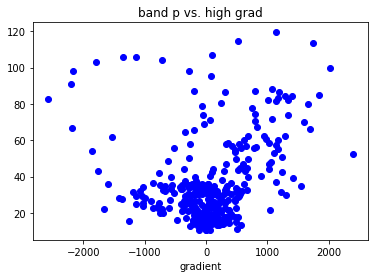

In [12]:
plot_bandpercent_highgrad(df_test_smaller)

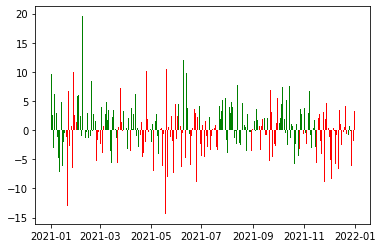

In [13]:
plot_candle_condition(df_test_smaller)

<Figure size 432x288 with 0 Axes>

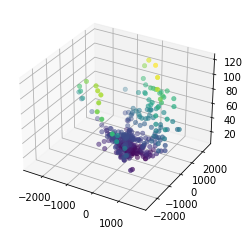

In [14]:
plot_gradients_percentage_3d(df_test_smaller)

<Figure size 432x288 with 0 Axes>

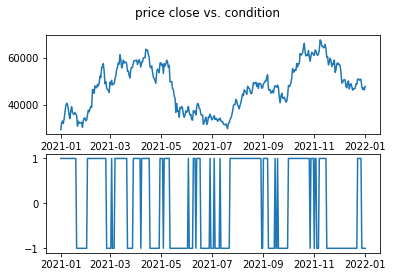

In [15]:
plot_close_condition(df_test_smaller)